In [168]:
import metview as mv
import rioxarray 
import xarray

mv.setoutput('jupyter', output_font_scale=1.5, plot_widget=False)

#### Procipitación

In [169]:
precipitacion_rds = rioxarray.open_rasterio('./cerro_saroche/cdsapi/total_precipitation.grib',
                              masked=True
                              )\
                              .squeeze()

ERROR: Ran out of file reading SECT0


In [170]:
precipitacion_rds.rio.crs

CRS.from_wkt('GEOGCS["Coordinate System imported from GRIB file",DATUM["unnamed",SPHEROID["Sphere",6367470,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

In [171]:
times = precipitacion_rds['band'].values

In [172]:
import pandas as pd
from datetime import datetime

time_lisrt = list(map(lambda x: datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').toordinal(),
                    pd.date_range(start='1970-01-01',periods=len(times),freq='m')
                    ))

time_lisrt[0:5]

[719193, 719221, 719252, 719282, 719313]

In [173]:
precipitacion_rds['band'] = time_lisrt

#### Elevación

In [174]:
def elevacion_create_dataset(da, band_name = 'variable', crs='epsg:4326'):
  """
  Funcion para la creacion del dataset
  """

  import xarray as xr

  ds = xarray.Dataset({
          band_name : xarray.DataArray(
                      data = da.data,
                      dims = ['band','y','x'],
                      coords = {'band':da['band'].data,'y': da['y'].data, 'x': da['x'].data},
                      attrs = da.attrs
                      )
            },
      attrs = da.attrs
      )

  ds.rio.write_crs(crs)

  return ds

In [206]:
import os
import xarray
from rioxarray.merge import merge_datasets

path_elevacion = './SRTMGL3/files/'
elevacion_files = list(map(lambda x: path_elevacion + x, os.listdir(path_elevacion) ))

In [207]:
data_file = list(map(lambda x: xarray.open_rasterio(x), elevacion_files))

/tmp/ipykernel_7692/1716967274.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  data_file = list(map(lambda x: xarray.open_rasterio(x), elevacion_files))


In [208]:
data_format = list(map(lambda x: create_dataset(x, 'elevacion'), data_file))

In [209]:
from rioxarray.merge import merge_datasets

rds_elevacion = merge_datasets(data_format)
rds_elevacion

<xarray.Dataset>
Dimensions:      (band: 1, y: 3601, x: 4801)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -72.0 -72.0 -72.0 -72.0 ... -68.0 -68.0 -68.0 -68.0
  * y            (y) float64 12.0 12.0 12.0 12.0 12.0 ... 9.002 9.002 9.001 9.0
    spatial_ref  int64 0
Data variables:
    elevacion    (band, y, x) int16 41 43 43 42 44 45 45 ... 77 82 80 81 77 74
Attributes:
    transform:   (0.0008333333333333334, 0.0, -69.00041666666667, 0.0, -0.000...
    res:         (0.0008333333333333334, 0.0008333333333333334)
    is_tiled:    0
    nodatavals:  (-32768.0,)
    scales:      (1.0,)
    offsets:     (0.0,)
    units:       ('m',)

In [210]:
rds_elevacion.rio.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]')

In [179]:
# cambiando proyeccion
rds_proj_elevacion = rds_elevacion.rio.reproject(precipitacion_rds.rio.crs)
rds_proj_elevacion

<xarray.Dataset>
Dimensions:      (x: 4801, y: 3601, band: 1)
Coordinates:
  * x            (x) float64 -72.0 -72.0 -72.0 -72.0 ... -68.0 -68.0 -68.0 -68.0
  * y            (y) float64 12.0 12.0 12.0 12.0 12.0 ... 9.003 9.002 9.001 9.0
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    elevacion    (band, y, x) int16 41 43 43 42 44 45 45 ... 77 82 80 81 77 74
Attributes:
    transform:   (0.0008333333333333334, 0.0, -69.00041666666667, 0.0, -0.000...
    res:         (0.0008333333333333334, 0.0008333333333333334)
    is_tiled:    0
    nodatavals:  (-32768.0,)
    scales:      (1.0,)
    offsets:     (0.0,)
    units:       ('m',)

In [180]:
rds_proj_elevacion.rio.crs

CRS.from_wkt('GEOGCS["Coordinate System imported from GRIB file",DATUM["unnamed",SPHEROID["Sphere",6367470,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

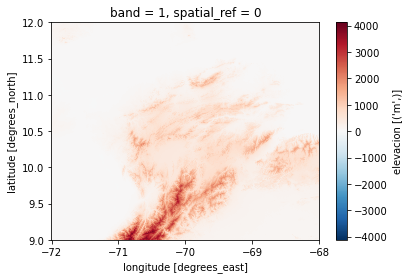

In [181]:
rds_proj_elevacion.elevacion.plot()

In [198]:
rds_proj_elevacion.to_netcdf('./cerro_saroche/SRTMGL3/vegetacion.nc')

In [3]:
### Test
import rioxarray
rds_elevacion = rioxarray.open_rasterio('./cerro_saroche/SRTMGL3/elevacion.nc',
                              masked=True
                              )\
                              .squeeze()

rds_elevacion.rio.crs


CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]')

In [212]:
rds_elevacion.attrs

{'is_tiled': 0,
 'nodatavals': -32768,
 'offsets': 0,
 'res': array([0.00083333, 0.00083333]),
 'scales': 1,
 'units': 'm',
 'scale_factor': 1.0,
 'add_offset': 0.0}

#### Datos de Vegetacion

In [182]:
path_vegetacion = './cerro_saroche/MOD13Q1_V6/summary/summary.MOD13Q1V6.20120101.20220423.nc'
rds = rioxarray.open_rasterio(path_vegetacion,
                              masked=True
                              )\
                              .squeeze()

rds

<xarray.Dataset>
Dimensions:                  (y: 116, x: 221, time: 198)
Coordinates:
  * y                        (y) float64 1.145e+06 1.145e+06 ... 1.119e+06
  * x                        (x) float64 -7.647e+06 -7.647e+06 ... -7.596e+06
  * time                     (time) int64 734503 734519 734535 ... 738252 738268
    spatial_ref              int64 0
Data variables:
    250m 16 days NDVI        (time, y, x) float32 ...
    250m 16 days EVI         (time, y, x) float32 ...
    250m 16 days VI Quality  (time, y, x) float32 ...
    QA_EVI                   (time, y, x) float32 ...
    QA_NDVI                  (time, y, x) float32 ...
Attributes: (12/173)
    ALGORITHMPACKAGEACCEPTANCEDATE:      102004
    ALGORITHMPACKAGEMATURITYCODE:        Normal
    ALGORITHMPACKAGENAME:                MOD_PR13A1
    ALGORITHMPACKAGEVERSION:             6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ...                                  ...
    SOUTHBOUNDINGCOORDINATE:             0
    SPSOPARAMETERS:                      2749, 4334, 2749a, 4334a
    TileID:                              51010008
    VERSIONID:                           6
    VERTICALTILENUMBER:                  8
    WESTBOUNDINGCOORDINATE:              -81.23412894334

In [185]:
# cambiando proyeccion
rds_proj = rds.rio.reproject(precipitacion_rds.rio.crs)
rds_proj

<xarray.Dataset>
Dimensions:                  (x: 226, y: 105, time: 198)
Coordinates:
  * x                        (x) float64 -69.9 -69.9 -69.89 ... -69.38 -69.38
  * y                        (y) float64 10.3 10.3 10.3 ... 10.07 10.06 10.06
  * time                     (time) int64 734503 734519 734535 ... 738252 738268
    spatial_ref              int64 0
Data variables:
    250m 16 days NDVI        (time, y, x) float32 nan nan nan ... nan nan nan
    250m 16 days EVI         (time, y, x) float32 nan nan nan ... nan nan nan
    250m 16 days VI Quality  (time, y, x) float32 nan nan nan ... nan nan nan
    QA_EVI                   (time, y, x) float32 nan nan nan ... nan nan nan
    QA_NDVI                  (time, y, x) float32 nan nan nan ... nan nan nan
Attributes: (12/173)
    ALGORITHMPACKAGEACCEPTANCEDATE:      102004
    ALGORITHMPACKAGEMATURITYCODE:        Normal
    ALGORITHMPACKAGENAME:                MOD_PR13A1
    ALGORITHMPACKAGEVERSION:             6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ...                                  ...
    SOUTHBOUNDINGCOORDINATE:             0
    SPSOPARAMETERS:                      2749, 4334, 2749a, 4334a
    TileID:                              51010008
    VERSIONID:                           6
    VERTICALTILENUMBER:                  8
    WESTBOUNDINGCOORDINATE:              -81.23412894334

In [186]:
rds_proj.rio.crs

CRS.from_wkt('GEOGCS["Coordinate System imported from GRIB file",DATUM["unnamed",SPHEROID["Sphere",6367470,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

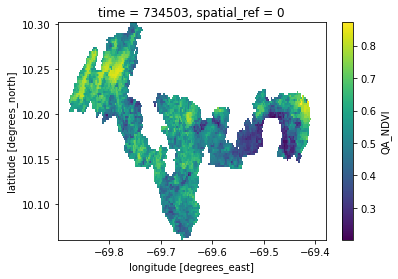

In [188]:
rds_proj.sel(time=734503).QA_NDVI.plot()

In [189]:
### Igualando proyeccion
rds_proj[['QA_EVI','QA_NDVI']].to_netcdf('vegetacion.nc')

In [190]:
vegetacion = mv.read('vegetacion.nc')
vegetacion.variables()

['QA_EVI', 'QA_NDVI', 'x', 'y', 'time', 'spatial_ref']

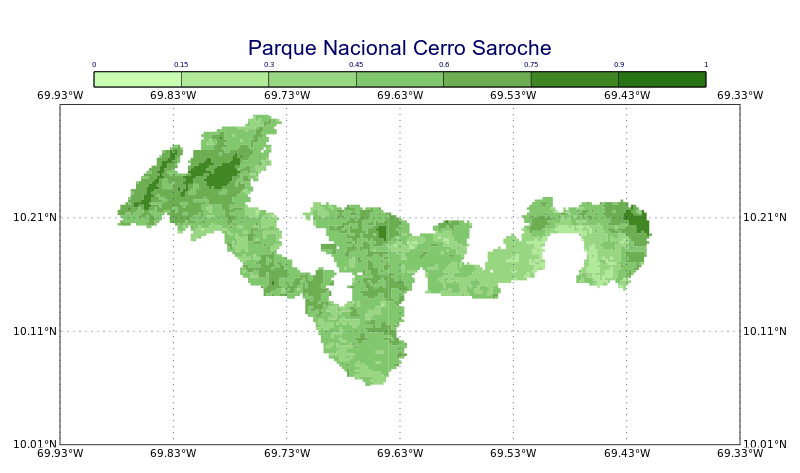

In [202]:
nvis = mv.netcdf_visualiser(netcdf_data=vegetacion,
                            netcdf_plot_type='geo_matrix',
                            netcdf_latitude_variable='y',
                            netcdf_longitude_variable='x',
                            netcdf_value_variable='QA_NDVI')

vegetation_shade_grid = mv.mcont(legend='on',
                                contour='on',
                                contour_level_selection_type='interval',
                                contour_interval=0.15,
                                contour_min_level=0,
                                contour_max_level=1,
                                contour_shade='on',
                                contour_shade_technique='grid_shading',
                                contour_shade_cell_resolution=20,
                                contour_shade_colour_method='palette',
                                contour_shade_palette_name='norway_green_7')


coast = mv.mcoast(
                    map_grid_colour              = "RGB(0.1358,0.201,0.4367)",
                    map_grid_latitude_increment=0.1,
                    map_grid_longitude_increment=0.1,
                    map_grid_latitude_reference=10.31,
                    map_grid_longitude_reference=-69.83,
                    map_grid_line_style="dot",
                    map_label_height=0.3,
                  )

crete_map = mv.geoview(map_area_definition='corners',
                       area=[10.31,-69.93,10.01,-69.33],
                       coastlines=coast)

#-------------------------
# rectangulo
latPos = [10.31,10.01,10.01,10.31,10.31]
lonPos = [-69.93,-69.93,-69.33,-69.33,-69.93]
incr = 1
pltLst = []

# define visualiser
vis = mv.mvl_geopolyline(latPos, lonPos, incr)
graph_area = mv.mgraph(
                  graph_type="curve",
                  graph_line_colour="RGB(255,99,71)",
                  graph_line_thickness="5",
                  graph_line_style="chain_dot",
              )


pltLst.extend([vis, graph_area])

# titulo
title = mv.mtext(
    text_lines=['Parque Nacional Cerro Saroche'],
    text_font_size=0.6,
    text_justification='centre',
    text_orientation='horizontal'
    )

#mv.plot(crete_map, nvis, vegetation_shade_grid, pltLst, title)
mv.plot(crete_map, nvis, vegetation_shade_grid, title)

In [192]:
regrid_gbav = mv.regrid(
    grid          = [0.01,0.01],
    interpolation = "grid_box_average",
    data          = vegetacion,
    accuracy      = 40,
    area=[10.61,-69.93,10.01,-69.33],
)

Python - ERROR  - 20220531.011718 - Line 0 in 'PythonScript': Assertion failed: bbox.north() >= bbox.south() in check, line 33 of /home/conda/feedstock_root/build_artifacts/metview-batch_1649747434666/work/mir/src/mir/util/BoundingBox.cc


Exception: Metview error: Assertion failed: bbox.north() >= bbox.south() in check, line 33 of /home/conda/feedstock_root/build_artifacts/metview-batch_1649747434666/work/mir/src/mir/util/BoundingBox.cc

In [ ]:
data = mv.retrieve(data=path_vegetacion,
                    area=[10.61,-69.93,10.01,-69.33],
                    grid=[0.1,0.1],
                    latitude='y',
                    longitude='x',
                    database='QA_NDVI'
                    )

Python - ERROR  - 20220528.015041 - Line 0 in 'PythonScript': The database 'QA_NDVI' is not known
Python - ERROR  - 20220528.015041 - Line 0 in 'PythonScript': The valid values are: 
Python - ERROR  - 20220528.015041 - Line 0 in 'PythonScript': Expected 6, got 0.
Python - ERROR  - 20220528.015041 - Line 0 in 'PythonScript': Could not find a MARS database to perform request
Python - ERROR  - 20220528.015041 - Line 0 in 'PythonScript': Request failed
Python - ERROR  - 20220528.015041 - Line 0 in 'PythonScript': Retrieve-> Error code: -2


Exception: Metview error: The database 'QA_NDVI' is not known

In [ ]:
fire_1x1_target_grid = mv.regrid(grid=[0.1,0.1],
                                 source='./cerro_saroche/cdsapi/total_precipitation.grib',
                                 area=[10.31,-69.93,10.01,-69.33],
                                 interpolation='grid_box_average',
                                 )
#
# fire_1x1_target_grid = fire_1x1_target_grid.nobitmap(0)

Python - ERROR  - 20220526.021048 - Line 0 in 'PythonScript': Assertion failed: bbox.north() >= bbox.south() in check, line 33 of /home/conda/feedstock_root/build_artifacts/metview-batch_1649747434666/work/mir/src/mir/util/BoundingBox.cc


Exception: Metview error: Assertion failed: bbox.north() >= bbox.south() in check, line 33 of /home/conda/feedstock_root/build_artifacts/metview-batch_1649747434666/work/mir/src/mir/util/BoundingBox.cc

#### Datos de precipitacion

In [ ]:
import metview as mv

In [ ]:
path_precipitacion = './test.grd'
precip = mv.Fieldset(path=path_precipitacion)

precip.ls()

Python - ERROR  - 20220528.021635 - Unable to find template predefined_grid_values from grib1/grid_255.def  [ecCodes]
Python - ERROR  - 20220528.021635 - grib_handle_new_from_message: No final 7777 in message! [ecCodes]
Python - ERROR  - 20220528.021635 - MvGridFactory: failed getting grib_get_long->typeOfGrid
Python - ERROR  - 20220528.021635 - Unable to find template predefined_grid_values from grib1/grid_255.def  [ecCodes]
Python - ERROR  - 20220528.021635 - grib_handle_new_from_message: No final 7777 in message! [ecCodes]
Python - ERROR  - 20220528.021635 - MvGridFactory: failed getting grib_get_long->typeOfGrid
Python - ERROR  - 20220528.021635 - Unable to find template predefined_grid_values from grib1/grid_255.def  [ecCodes]
Python - ERROR  - 20220528.021635 - grib_handle_new_from_message: No final 7777 in message! [ecCodes]
Python - ERROR  - 20220528.021635 - MvGridFactory: failed getting grib_get_long->typeOfGrid
Python - ERROR  - 20220528.021635 - Unable to find template pred

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,0,unknown,surface,0,0,0,0,None,None,None
1,0,unknown,surface,0,0,0,0,None,None,None
2,0,unknown,surface,0,0,0,0,None,None,None
3,0,unknown,surface,0,0,0,0,None,None,None
4,0,unknown,surface,0,0,0,0,None,None,None
5,0,unknown,surface,0,0,0,0,None,None,None
6,0,unknown,surface,0,0,0,0,None,None,None
7,0,unknown,surface,0,0,0,0,None,None,None
8,0,unknown,surface,0,0,0,0,None,None,None


In [ ]:
path_precipitacion = './cerro_saroche/cdsapi/total_precipitation.grib'
precip = mv.Fieldset(path=path_precipitacion)

precip.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,tp,surface,0,19700101,0,24,fc,regular_ll
1,ecmf,tp,surface,0,19700201,0,24,fc,regular_ll
2,ecmf,tp,surface,0,19700301,0,24,fc,regular_ll
3,ecmf,tp,surface,0,19700401,0,24,fc,regular_ll
4,ecmf,tp,surface,0,19700501,0,24,fc,regular_ll
...,...,...,...,...,...,...,...,...,...
621,ecmf,tp,surface,0,20211001,0,0-24,fc,regular_ll
622,ecmf,tp,surface,0,20211101,0,0-24,fc,regular_ll
623,ecmf,tp,surface,0,20211201,0,0-24,fc,regular_ll


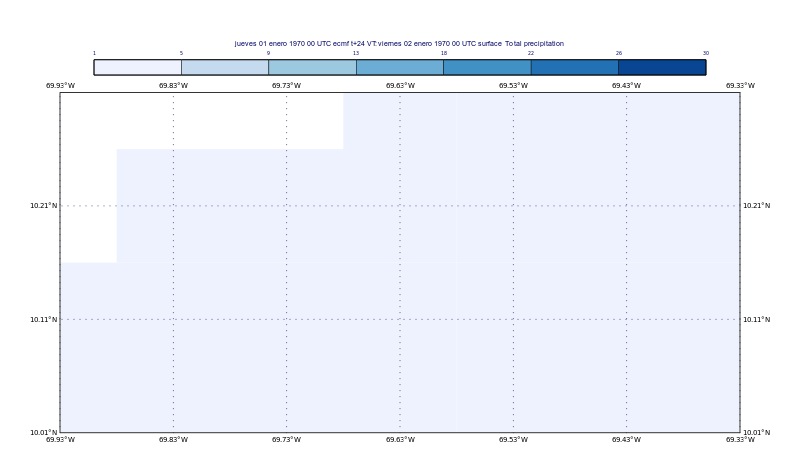

In [ ]:
grid_shade = mv.mcont(
    legend                         = "on",
    contour                        = "off",
    contour_level_selection_type   = "level_list",
    contour_level_list             = [1,5,9,13,18,22,26,30],
    contour_shade                  = "on",
    contour_shade_technique        = "grid_shading",
    contour_shade_colour_method    = "palette",
    contour_shade_palette_name     = "colorbrewer_Blues_7_r",
    grib_scaling_of_derived_fields = "on"
    )

coastlines = mv.mcoast(
    map_grid_colour              = "RGB(0.1358,0.201,0.4367)",
    map_grid_latitude_increment=0.1,
    map_grid_longitude_increment=0.1,
    map_grid_latitude_reference=10.31,
    map_grid_longitude_reference=-69.83,
    map_grid_line_style="dot",
    map_label_height=0.3,
    )

view = mv.geoview(
    map_area_definition = "corners",
    area                = [10.31,-69.93,10.01,-69.33],
    coastlines          = coastlines
    )

mv.plot(view, precip, grid_shade)